## Problem Metadata 
DO NOT DELETE (JSON Block; the metadata and course context MUST be in the first cell)

```json
{
    "problem_title": "compressorPyCalor",
    "author": "tschutzius",
    "year": "Fa25",
    "difficulty_tags": ["easy"],
    "topic": "Control Volumes",
    "lecture_reference": {
        "lecture_id": "1_hb7swztw",
        "subtopics": [
            {
              "key": "Fa25-L5b-3.0",
              "title": "Example: Energy Analysis of a Steady-flow System: Compressor",
            }
        ]
    },
    "book_reference": {
              "chapter_number": 5,
              "title": "Mass and Energy Analysis of Control Volumes",
        "sections": [
            "Some Steady-Flow Engineering Devices",
        ]
    },
    "notes": ""
}
```

## 1. Problem Statement
Air enters a compressor with a mass flow rate of 0.02 kg/s at 100 kPa and 290 K and exits the compressor at 600 kPa and 500 K. The compressor is cooled with 1 kJ/kg. 

**Goal**: 
* Determine the shaft power input.

## 2. Schematic
Draw a compressor with a control volume drawn around it. Indicate that power is transferred in from a shaft and heat is transferred out. 

## 3. Assumptions and Approximations
* Neglect kinetic and potential energy
* Steady-flow system
* Determine properties using `pyCalor`. 
* Changes in enthalpy can be determined from $dh = c_p dT$ by assuming that air is an ideal gas.  
    
## 4. Physical Laws and Governing Equations

Conservation of energy for a compressor:
$$\dot{W}_\text{in} = \dot{m} \left(h_2 - h_1 \right) $$

Assuming air behaves as an ideal gas, we can write:
$$\dot{W}_\text{in} \approx \dot{m} c_p \left(T_2 - T_1 \right) $$

In [2]:
## 5. Properties (Code Cell)
!pip install pyCalor
from pyCalor import thermo as th

#For the properties, I am using the notation "in" and "out" as well as "1" and "2", where "in" is also "1" and "out" is also "2"

fluid = 'Air'

mdot_kgperS = 0.02 #kg/s

# state 1
P1_Pa = 100e3 #Pa
T1_K = 290 #K
st1 = th.state(fluid,T=(T1_K,'K'),p=(P1_Pa,'Pa'),name='1')
h1_JperKg = st1.h*1e3
cp_kJperKgPerK = st1.cp

# state 2
P2_Pa = 600e3 #Pa
T2_K = 500 #K
st2 = th.state(fluid,T=(T2_K,'K'),p=(P2_Pa,'Pa'),name='2')
h2_JperKg = st2.h*1e3

qout_JperKg = 1e3 #J/kg

4278.032995931938


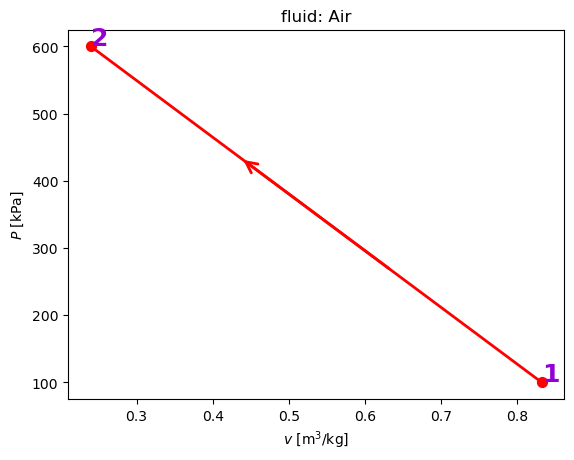

4245.318177469188
0.7647163659994816


In [5]:
## 6 Calculations (Code Cell)
QdotOut_JperS = qout_JperKg*mdot_kgperS #J/s

WdotIn_JperS = QdotOut_JperS + mdot_kgperS*(h2_JperKg-h1_JperKg); print(WdotIn_JperS) #J/s

pr = th.process([(st1,st2)])

pr.plot('pv')

### Alternative solution

WdotIn_JperS_alt = QdotOut_JperS + mdot_kgperS*(cp_kJperKgPerK*1e3)*(T2_K-T1_K); print(WdotIn_JperS_alt) #J/s

error = ((WdotIn_JperS - WdotIn_JperS_alt)/WdotIn_JperS)*100; print(error)

## 7. Summary and Reasoning
We see that the ideal gas assumption is a good one since the error for determining the power input is less than 1% compared to using thermodynamic properties (pyCalor). 